In [84]:
import numpy as np # linear algebra
import pandas as pd # data processing
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score


## Read Data

In [85]:
data_name = "dummy"
# data_name = "dummy_object"
df = pd.read_csv(f"../datasets/data_{data_name}.csv")
df_copy = df.copy()
df_copy.head()

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,...,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,13,460,25,18.0,neutral or dissatisfied
1,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,25,235,1,6.0,neutral or dissatisfied
2,0,0,1,0,0,0,0,0,1,0,...,1,0,1,0,0,26,1142,0,0.0,satisfied
3,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,25,562,11,9.0,neutral or dissatisfied
4,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,61,214,0,0.0,satisfied


## Train-Test Splitting

In [86]:
X= df_copy.iloc[:,:-1]
X

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,...,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,13,460,25,18.0
1,0,0,0,1,0,0,0,0,1,0,...,1,1,0,1,0,0,25,235,1,6.0
2,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,0,26,1142,0,0.0
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,25,562,11,9.0
4,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,0,61,214,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,0,0,0,1,0,0,0,0,0,1,...,1,1,0,1,0,0,34,526,0,0.0
129483,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,23,646,0,0.0
129484,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,17,828,0,0.0
129485,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,0,14,1127,0,0.0


In [87]:
y = df_copy.iloc[:,-1]
y

0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
129482    neutral or dissatisfied
129483                  satisfied
129484    neutral or dissatisfied
129485                  satisfied
129486    neutral or dissatisfied
Name: satisfaction, Length: 129487, dtype: object

In [88]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(f"Shape of training set is : {X_train.shape} and test set is :{X_test.shape}" )

Shape of training set is : (90640, 96) and test set is :(38847, 96)


In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train

array([[-0.17632264, -0.45437674,  1.7418388 , ...,  1.89256284,
         1.04110417,  0.98439561],
       [-0.17632264, -0.45437674, -0.57410594, ..., -0.66088167,
        -0.39052142, -0.29022307],
       [-0.17632264,  2.20081686, -0.57410594, ...,  0.65289057,
         0.71696252,  0.77195916],
       ...,
       [-0.17632264, -0.45437674, -0.57410594, ..., -0.17923194,
         0.28477367, -0.05123207],
       [-0.17632264, -0.45437674, -0.57410594, ..., -0.73498162,
        -0.39052142, -0.3964413 ],
       [ 5.67142135, -0.45437674, -0.57410594, ..., -0.94025854,
        -0.39052142, -0.3964413 ]])

## Set paramiter CV

In [90]:
# ทำ Cross Validation
k_folds = 15  # จำนวน k-folds 

## K-NN(K Nearest Neighbours)

In [91]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier(n_neighbors=5)

#fit the model with trained data
start_time = time.time()  # เวลาเริ่มต้น
model_knn.fit(X_train,y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_KNN = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_KNN:.6f} วินาที")


เวลาที่ใช้ในการฝึกโมเดล: 0.085547 วินาที


In [92]:

#Predict the accuracy of the model
y_pred_knn=model_knn.predict(X_test)

accuracy_KNN=accuracy_score(y_pred_knn,y_test)
print(f"Accuracy of Knn is : {round(accuracy_KNN*100,2)} % .")

report=classification_report(y_test,y_pred_knn)
print("Classification Report is : \n",report)

Accuracy of Knn is : 94.2 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.96      0.95     22029
              satisfied       0.94      0.92      0.93     16818

               accuracy                           0.94     38847
              macro avg       0.94      0.94      0.94     38847
           weighted avg       0.94      0.94      0.94     38847



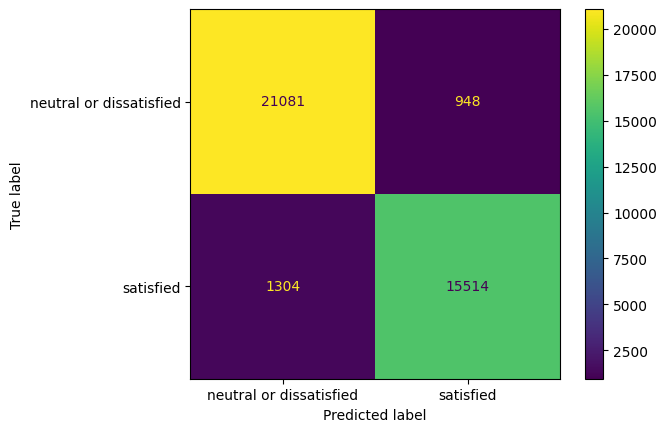

In [93]:
cm_2= confusion_matrix(y_test, y_pred_knn, labels=model_knn.classes_)
disp_2= ConfusionMatrixDisplay(confusion_matrix=cm_2,
                          display_labels=model_knn.classes_)
disp_2.plot()

In [94]:
# ทำ Cross Validation
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_knn = cross_val_score(model_knn, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (KNN): {cv_scores_knn}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_knn):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_knn):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_KNN = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_KNN:.6f} วินาที")


Cross Validation Scores (KNN): [0.94092338 0.94241271 0.94290915 0.94191627 0.94605328 0.94208175
 0.93943406 0.94108886 0.94489492 0.94141982 0.94571334 0.94472029
 0.94654088 0.94157564 0.94935452]
Mean CV Accuracy: 0.9434
Standard Deviation CV Accuracy: 0.0026
เวลาที่ใช้ในการทำ Cross Validation: 12.583474 วินาที


In [95]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_knn.predict(X_train))
test_accuracy = accuracy_score(y_test, model_knn.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.9597859664607238
Test Accuracy: 0.9420289855072463


In [96]:
import pickle
pickle_out = open("../model/model_knn.pkl", mode = "wb")
pickle.dump(model_knn, pickle_out)
pickle_out.close()

with open('../model/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Load Model Predic

In [97]:
import pickle
df_t = pd.read_csv(f"../datasets/data_{data_name}.csv")
df_sam = df_t.sample(20)
df_sam

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,...,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
110986,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,55,373,9,10.0,satisfied
122006,0,0,1,0,0,0,0,0,1,0,...,1,0,1,0,0,48,1555,7,8.0,satisfied
9880,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,23,265,33,24.0,neutral or dissatisfied
119352,0,0,0,0,0,1,0,0,1,0,...,0,1,0,1,0,63,967,27,14.0,satisfied
119221,0,0,1,0,0,0,0,0,1,0,...,1,0,1,0,0,39,2446,2,0.0,satisfied
33067,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,35,719,0,0.0,satisfied
116850,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,35,925,0,0.0,neutral or dissatisfied
11333,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,29,3883,0,0.0,satisfied
64689,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,40,110,0,0.0,neutral or dissatisfied
23764,1,0,0,0,0,0,1,0,0,0,...,1,0,1,0,0,54,1866,6,0.0,satisfied


In [98]:

X_sam= df_sam.iloc[:,:-1]
X_sam


,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,...,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
110986,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,55,373,9,10.0
122006,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,0,48,1555,7,8.0
9880,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,23,265,33,24.0
119352,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,1,0,63,967,27,14.0
119221,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,0,39,2446,2,0.0
33067,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,35,719,0,0.0
116850,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,35,925,0,0.0
11333,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,29,3883,0,0.0
64689,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,40,110,0,0.0
23764,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,54,1866,6,0.0


In [99]:
y_sam = df_sam.iloc[:,-1]
y_sam


110986                  satisfied
122006                  satisfied
9880      neutral or dissatisfied
119352                  satisfied
119221                  satisfied
33067                   satisfied
116850    neutral or dissatisfied
11333                   satisfied
64689     neutral or dissatisfied
23764                   satisfied
1243      neutral or dissatisfied
114746    neutral or dissatisfied
28470                   satisfied
39367     neutral or dissatisfied
56305                   satisfied
686       neutral or dissatisfied
120216                  satisfied
14365                   satisfied
80645                   satisfied
30619     neutral or dissatisfied
Name: satisfaction, dtype: object

In [100]:

model = pickle.load(open("../model/model_knn.pkl", 'rb'))
scaler_1 = pickle.load(open("../model/scaler.pkl", 'rb'))

scaler_new = scaler_1.transform(X_sam)
preds = model.predict(scaler_new)
accuracy_KNN=accuracy_score(preds,y_sam)
print(f"Accuracy of Knn is : {round(accuracy_KNN*100,2)} % .")

Accuracy of Knn is : 100.0 % .
